In [24]:
#https://www.kaggle.com/harnoor343/fall-detection-accelerometer-data
# https://www.kaggle.com/code/mmttdebbcc/notebook9689a93a64 

import numpy as np
import pandas as pd
import glob

import os
# create a new directory called 'kaggle_normalized', ignores if already existed
os.makedirs('./kaggle_normalized', exist_ok = True)
 # this is your ouput data, which will be normalized

labels = ['runFall', 'downSit', 'freeFall', 'runSit', 'walkFall', 'walkSit']
for l in labels:
    #read all csv files in the directory 'kaggle_data' + l, delimit by ';'
    df = pd.concat([pd.read_csv(f, sep=';') for f in glob.glob('/kaggle/input/fall-detection-accelerometer-data/' + l + '/*.csv')], ignore_index = True)
    #assign 1 to df column 'Label'
    df['Label'] = 1
    # save columns 'DeviceOrientation', 'AccelerationX','AccelerationY', 'AccelerationZ', 'Label' to csv 
    # for kaggle normalized 
    df[['DeviceOrientation', 'AccelerationX','AccelerationY', 'AccelerationZ', 'Label']].to_csv('./kaggle_normalized/' + l + '.csv', index=False)
  
#read it in from kaggle_normalized
df = pd.concat([pd.read_csv(f) for f in glob.glob('./kaggle_normalized/*.csv')], ignore_index = True)
columns = ['DeviceOrientation', 'AccelerationX','AccelerationY', 'AccelerationZ', 'Label']


In [25]:
# for each column in 'Accerlation', 'AccelerationY', 'AccelerationZ', and a new column that is the fft of the original column
for c in ['AccelerationX', 'AccelerationY', 'AccelerationZ']:
    df[c + '_fft'] = np.fft.fft(df[c])


<AxesSubplot:>

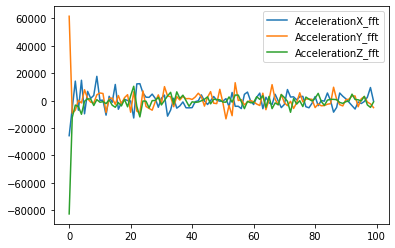

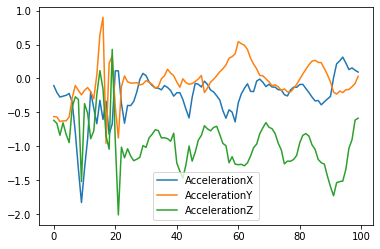

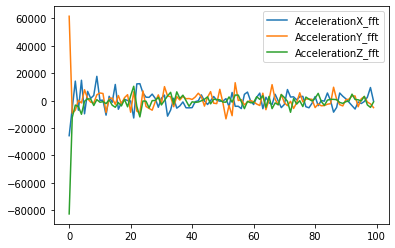

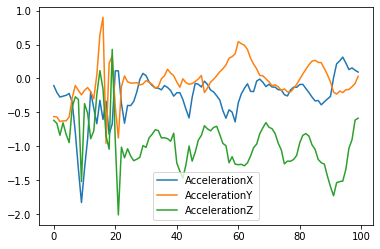

In [29]:
# plot the first 100 column 'AccelerationX' and 'AccelerationX_fft'
# Hannahs Comment: AI does not recgonize the first fft of ____ I think, so just rewrite
df[['AccelerationX_fft', 'AccelerationY_fft', 'AccelerationZ_fft']].iloc[:100].plot()
df[['AccelerationX', 'AccelerationY', 'AccelerationZ']].iloc[:100].plot()

# Versus Head (the same)

df[['AccelerationX_fft', 'AccelerationY_fft', 'AccelerationZ_fft']].head(100).plot()
df[['AccelerationX', 'AccelerationY', 'AccelerationZ']].head(100).plot()

In [32]:
# convert column 'DeviceOreignation' to one-hot encoding
df = pd.get_dummies(df, columns=['DeviceOrientation'])
x = np.array(df.drop(['Label'], axis=1))
y = np.array(df['Label'])

print(x)
#normalize the data
import sklearn.model_selection as model_selection
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.3, random_state=42)
# Hannah's Comment my AI added random_state = 42; Makes sure that the randomizness works well or something I forgot
# Hannah's Comment: the +0.j is a because the data is shown as a complex number



KeyError: "None of [Index(['DeviceOrientation'], dtype='object')] are in the [columns]"

In [36]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

print(x_train)
# build a neural network that uses the fft of the accelermeter data to predict the label
model = Sequential()
# flatten the input data to a 1D array
#Hannah's comment: The layers added in the Edge Impulse
model.add(keras.layers.Flatten(input_shape=(12,)))
model.add(keras.layers.Dense(64, activation = 'relu', input_shape=(6,)))
model.add(keras.layers.Dense(64, activation = 'relu'))
model.add(keras.layers.Dense(6, activation ='softmax'))

model.compile(optimizer = 'adam', 
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

#fitting aspect of the model 
model.fit(x_train, y_train, epochs = 10, batch_size = 32)

#find the accuracy
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

[[-0.03266907+0.j -1.33102417+0.j -0.10858154+0.j ...  0.        +0.j
   1.        +0.j  0.        +0.j]
 [ 0.10514832+0.j -0.01628113+0.j -1.30073547+0.j ...  0.        +0.j
   0.        +0.j  1.        +0.j]
 [ 1.14454651+0.j -0.00724792+0.j -0.02598572+0.j ...  1.        +0.j
   0.        +0.j  0.        +0.j]
 ...
 [-0.86703491+0.j  0.60722351+0.j  0.03773499+0.j ...  0.        +0.j
   1.        +0.j  0.        +0.j]
 [-0.79258728+0.j  0.99806213+0.j -0.07177734+0.j ...  0.        +0.j
   0.        +0.j  1.        +0.j]
 [-0.58184814+0.j  0.65861511+0.j -0.06001282+0.j ...  0.        +0.j
   0.        +0.j  1.        +0.j]]
Epoch 1/10
4432/4432 [==============================] - 10s 2ms/step - loss: 0.0314 - accuracy: 0.9985
Epoch 2/10
4432/4432 [==============================] - 9s 2ms/step - loss: 1.1021e-05 - accuracy: 1.0000
Epoch 3/10
4432/4432 [==============================] - 10s 2ms/step - loss: 1.3151e-06 - accuracy: 1.0000
Epoch 4/10
4432/4432 [==========================

Exception ignored in: <function IteratorResourceDeleter.__del__ at 0x7f5c290658c0>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/tensorflow/python/data/ops/iterator_ops.py", line 546, in __del__
    handle=self._handle, deleter=self._deleter)
  File "/opt/conda/lib/python3.7/site-packages/tensorflow/python/ops/gen_dataset_ops.py", line 1264, in delete_iterator
    _ctx, "DeleteIterator", name, handle, deleter)
KeyboardInterrupt: 


1900/1900 [==============================] - 3s 2ms/step - loss: 1.9613e-11 - accuracy: 1.0000
Test accuracy: 1.0
